<a href="https://colab.research.google.com/github/BSpekter/Special-Public/blob/master/FASHION_MNIST_acc92_62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets,transforms
from torch import  optim
import seaborn
import torch.nn.functional as F
import numpy as np
import time

import helper
import matplotlib.pyplot as plt

from torch.autograd import Variable
import torch.nn as nn

In [2]:
 transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])
 trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, transform=transform, download=True)
 trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)
 testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, transform=transform, download = True)
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=64)


  0%|          | 16384/26421880 [00:00<03:02, 145058.90it/s]

26427392it [00:00, 78744316.58it/s]                            


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


32768it [00:00, 446772.88it/s]
  2%|▏         | 98304/4422102 [00:00<00:04, 905727.09it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:00, 22573711.15it/s]                         
8192it [00:00, 144441.48it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [0]:
###ВСТАВОЧНЫЙ КОД###

num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [0]:
###njnkjnlkjnlkjnlkjn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.fc1 = nn.Linear(128*49, 128)
        self.fc2 = nn.Linear(128, 10)

        self.LogSoftmax = nn.LogSoftmax( dim=1)

        #self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)

        out = out.reshape(out.size(0), -1)

        out = F.relu(self.fc1(out))
        #out = self.dropout(F.relu(self.fc2(out)))
        #out = self.fc2(out)
        out = self.LogSoftmax(self.fc2(out))
        return out

In [0]:
###ВСТАВОЧНЫЙ КОД###


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [14]:
###ВСТАВОЧНЫЙ КОД###

train_loss_list, test_loss_list = [], []
train_acc_list, test_acc_list = [], []

for e in range(num_epochs):
    start_time = time.time()

    train_loss, test_loss = [], []
    train_acc, test_acc = [], []

    model.train(True)
    for images, labels in trainloader:
        #Run the model
        output = model(images)
        loss = criterion(output, labels)
        train_loss.append(loss.item())

        #Backprop and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(output.data, 1)
        correct = (predicted == labels).sum().item()
        train_acc.append(correct / total)

    model.train(False)

    for images, labels in testloader:
        output = model(images)
        loss = criterion(output, labels)
        test_loss.append(loss.item())

        total = labels.size(0)
        _, predicted = torch.max(output.data, 1)
        correct = (predicted == labels).sum().item()
        test_acc.append(correct / total)

    #Printing results for the epoch
    print("Epoch {} of {} took {:.3f}s".format(
        e+1, num_epochs, time.time()-start_time
    ))

    value_train_loss = np.mean(train_loss)
    value_test_loss = np.mean(test_loss)
    value_train_accuracy = np.mean(train_acc) * 100
    value_test_accuracy = np.mean(test_acc) * 100

    train_loss_list.append(value_train_loss)
    test_loss_list.append(value_test_loss)
    train_acc_list.append(value_train_accuracy)
    test_acc_list.append(value_test_accuracy)

    print("Training loss in this epoch: \t{:.6f}".format(
        value_train_loss))
    print("Test accuracy in this epoch: \t\t\t{:.2f} %".format(
        value_test_accuracy))



Epoch 1 of 5 took 225.922s
Training loss in this epoch: 	0.072408
Test accuracy in this epoch: 			92.61 %
Epoch 2 of 5 took 225.444s
Training loss in this epoch: 	0.057144
Test accuracy in this epoch: 			92.47 %
Epoch 3 of 5 took 225.240s
Training loss in this epoch: 	0.047289
Test accuracy in this epoch: 			92.68 %
Epoch 4 of 5 took 225.111s
Training loss in this epoch: 	0.037628
Test accuracy in this epoch: 			92.30 %
Epoch 5 of 5 took 225.367s
Training loss in this epoch: 	0.034817
Test accuracy in this epoch: 			92.02 %


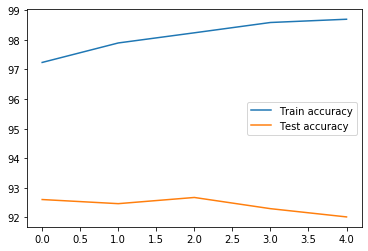

In [16]:
###ВСТАВОЧНЫЙ КОД###

plt.plot(train_acc_list, label="Train accuracy")
plt.plot(test_acc_list, label="Test accuracy")
plt.legend()

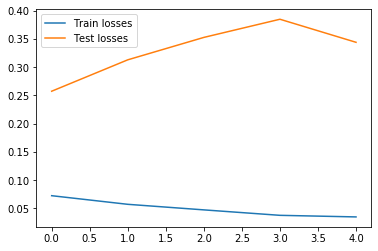

In [17]:
###ВСТАВОЧНЫЙ КОД###

plt.plot(train_loss_list, label="Train losses")
plt.plot(test_loss_list, label="Test losses")
plt.legend()

In [23]:
num_epochs=5

# Train the model
total_step = len(trainloader)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/938], Loss: 0.4789, Accuracy: 81.25%
Epoch [1/5], Step [200/938], Loss: 0.3696, Accuracy: 85.94%
Epoch [1/5], Step [300/938], Loss: 0.3574, Accuracy: 90.62%
Epoch [1/5], Step [400/938], Loss: 0.4609, Accuracy: 81.25%
Epoch [1/5], Step [500/938], Loss: 0.2186, Accuracy: 93.75%
Epoch [1/5], Step [600/938], Loss: 0.3116, Accuracy: 84.38%
Epoch [1/5], Step [700/938], Loss: 0.1527, Accuracy: 95.31%
Epoch [1/5], Step [800/938], Loss: 0.3602, Accuracy: 84.38%
Epoch [1/5], Step [900/938], Loss: 0.3201, Accuracy: 92.19%
Epoch [2/5], Step [100/938], Loss: 0.2798, Accuracy: 89.06%
Epoch [2/5], Step [200/938], Loss: 0.3581, Accuracy: 87.50%
Epoch [2/5], Step [300/938], Loss: 0.1788, Accuracy: 96.88%
Epoch [2/5], Step [400/938], Loss: 0.1038, Accuracy: 96.88%
Epoch [2/5], Step [500/938], Loss: 0.1777, Accuracy: 93.75%
Epoch [2/5], Step [600/938], Loss: 0.2441, Accuracy: 89.06%
Epoch [2/5], Step [700/938], Loss: 0.2059, Accuracy: 93.75%
Epoch [2/5], Step [800/938], Loss: 0.276

In [24]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the test images: 92.62 %


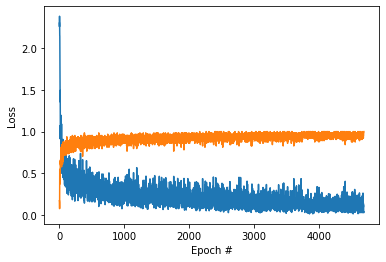

In [25]:
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.plot(loss_list)
plt.plot(acc_list)
plt.show()

In [0]:
nn.BatchNorm2d(16)

In [0]:
###njnkjnlkjnlkjnlkjn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            )
        self.layer2 = nn.Sequential(
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.fc1 = nn.Linear(128*49, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.LogSoftmax = nn.LogSoftmax( dim=1)

        self.Dropout = nn.Dropout(p=0.3)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.Dropout(self.layer2(out))
        out = self.layer3(out)

        out = out.reshape(out.size(0), -1)

        out = F.relu(self.fc1(out))
        #out = self.dropout(F.relu(self.fc2(out)))
        #out = self.fc2(out)
        out = self.Dropout(F.relu(self.fc2(out)))
        out = self.LogSoftmax(self.fc3(out))
        return out

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
num_epochs=5
# Train the model
total_step = len(trainloader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/5], Step [100/938], Loss: 0.4289, Accuracy: 79.69%
Epoch [1/5], Step [200/938], Loss: 0.4325, Accuracy: 85.94%
Epoch [1/5], Step [300/938], Loss: 0.3483, Accuracy: 89.06%
Epoch [1/5], Step [400/938], Loss: 0.4094, Accuracy: 81.25%
Epoch [1/5], Step [500/938], Loss: 0.2955, Accuracy: 93.75%
Epoch [1/5], Step [600/938], Loss: 0.3462, Accuracy: 93.75%
Epoch [1/5], Step [700/938], Loss: 0.3381, Accuracy: 90.62%
Epoch [1/5], Step [800/938], Loss: 0.2319, Accuracy: 92.19%
Epoch [1/5], Step [900/938], Loss: 0.5452, Accuracy: 81.25%
Epoch [2/5], Step [100/938], Loss: 0.2240, Accuracy: 92.19%
Epoch [2/5], Step [200/938], Loss: 0.3782, Accuracy: 89.06%
Epoch [2/5], Step [300/938], Loss: 0.3522, Accuracy: 82.81%
Epoch [2/5], Step [400/938], Loss: 0.3484, Accuracy: 84.38%
Epoch [2/5], Step [500/938], Loss: 0.3209, Accuracy: 85.94%
Epoch [2/5], Step [600/938], Loss: 0.2775, Accuracy: 89.06%
Epoch [2/5], Step [700/938], Loss: 0.2052, Accuracy: 93.75%
Epoch [2/5], Step [800/938], Loss: 0.325

In [37]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the test images: {} %'.format((correct / total) * 100))
    

Test Accuracy of the model on the test images: 92.22 %


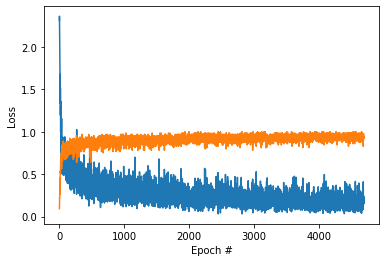

In [38]:
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.plot(loss_list)
plt.plot(acc_list)
plt.show()

**Абсолютно новая модель**

In [0]:
num_epochs = 5
#num_classes = 10
#batch_size = 100
#learning_rate = 0.001